In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')
colors=['goldenrod','mediumseagreen','cornflowerblue','cadetblue','tan']

In [2]:
train_data=pd.read_csv('../dataset/Dataset.csv')

In [3]:
train_data.head()

,Unnamed: 0,Title,Score,ID,Image,NUM_Comments,Created,Body,Coronavirus,Politics,...,Scheduled,| Stickied Topic |,| Unverified Content / Disreputed Source |,Science/Technology,Food,| Not Original/Relevant Title |,| Social Media Rules |,CAA-NRC-NPR,Megathread,🥳
0,0,Coronavirus (COVID-19) Megathread - News and U...,287,fqqdsg,https://www.reddit.com/r/india/comments/fqqdsg...,6834,1.585451e+09,**Central thread for sharing coronavirus News ...,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,Firozabad police fact-checking zee news (trans...,680,fwcz7h,https://i.redd.it/jbal4gxocbr41.jpg,62,1.586258e+09,NaN,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2,Donald Trump talks of ‘retaliation’ if India t...,371,fwclvi,https://economictimes.indiatimes.com/industry/...,135,1.586257e+09,NaN,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3,Mom came up with this impressive idea to celeb...,3129,fvz69t,https://i.redd.it/gurfdfd1e7r41.jpg,183,1.586210e+09,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,9 PM 9 Minutes: House Catches Fire In Bihar; G...,181,fwdysc,https://news.abplive.com/news/india/coronaviru...,14,1.586262e+09,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0


# Column Names
Renaming the Names so that they can  be accessed more easily

In [4]:
train_data=train_data.rename(columns={
    'Unnamed: 0':'idx', 
    'NUM_Comments':'Num_Comments',
    'Coronavirus':'Label1Coronovirus', 
    'Politics':'Label2Politics', 
    'Non-Political':'Label3Non-Political',
    'Unnamed: 11':'Label4None', 
    '| Repost |':'Label5Repost', 
    'Unverified':'Label6Unverified', 
    'Policy/Economy':'Label7Policy/Economy',
    'Photography':'Label8Photography', 
    'Business/Finance':'Label9Buisness/Finance', 
    'AskIndia':'Label10AskIndia',
    'Scheduled':'Label11Scheduled',
    '| Stickied Topic |':'Label12Stickied-Topic', 
    '| Unverified Content / Disreputed Source |':'Label13Unverified-Content',
    'Science/Technology':'Label14Science/Technology', 
    'Food':'Label15Food', 
    '| Not Original/Relevant Title |':'Label16Not Original',
    '| Social Media Rules |':'Label17Social Media', 
    'CAA-NRC-NPR':'Label18CAA/NRC', 
    'Megathread':'Label19Megathread', 
    '🥳':'Label20Unk'})


train_data.columns

Index(['idx', 'Title', 'Score', 'ID', 'Image', 'Num_Comments', 'Created',
       'Body', 'Label1Coronovirus', 'Label2Politics', 'Label3Non-Political',
       'Label4None', 'Label5Repost', 'Label6Unverified',
       'Label7Policy/Economy', 'Label8Photography', 'Label9Buisness/Finance',
       'Label10AskIndia', 'Label11Scheduled', 'Label12Stickied-Topic',
       'Label13Unverified-Content', 'Label14Science/Technology', 'Label15Food',
       'Label16Not Original', 'Label17Social Media', 'Label18CAA/NRC',
       'Label19Megathread', 'Label20Unk'],
      dtype='object')

In [5]:
labels=train_data.columns[8:]
labels

Index(['Label1Coronovirus', 'Label2Politics', 'Label3Non-Political',
       'Label4None', 'Label5Repost', 'Label6Unverified',
       'Label7Policy/Economy', 'Label8Photography', 'Label9Buisness/Finance',
       'Label10AskIndia', 'Label11Scheduled', 'Label12Stickied-Topic',
       'Label13Unverified-Content', 'Label14Science/Technology', 'Label15Food',
       'Label16Not Original', 'Label17Social Media', 'Label18CAA/NRC',
       'Label19Megathread', 'Label20Unk'],
      dtype='object')

In [6]:
vals=[]

for i in labels:
    vals.append(train_data[i].value_counts()[1])

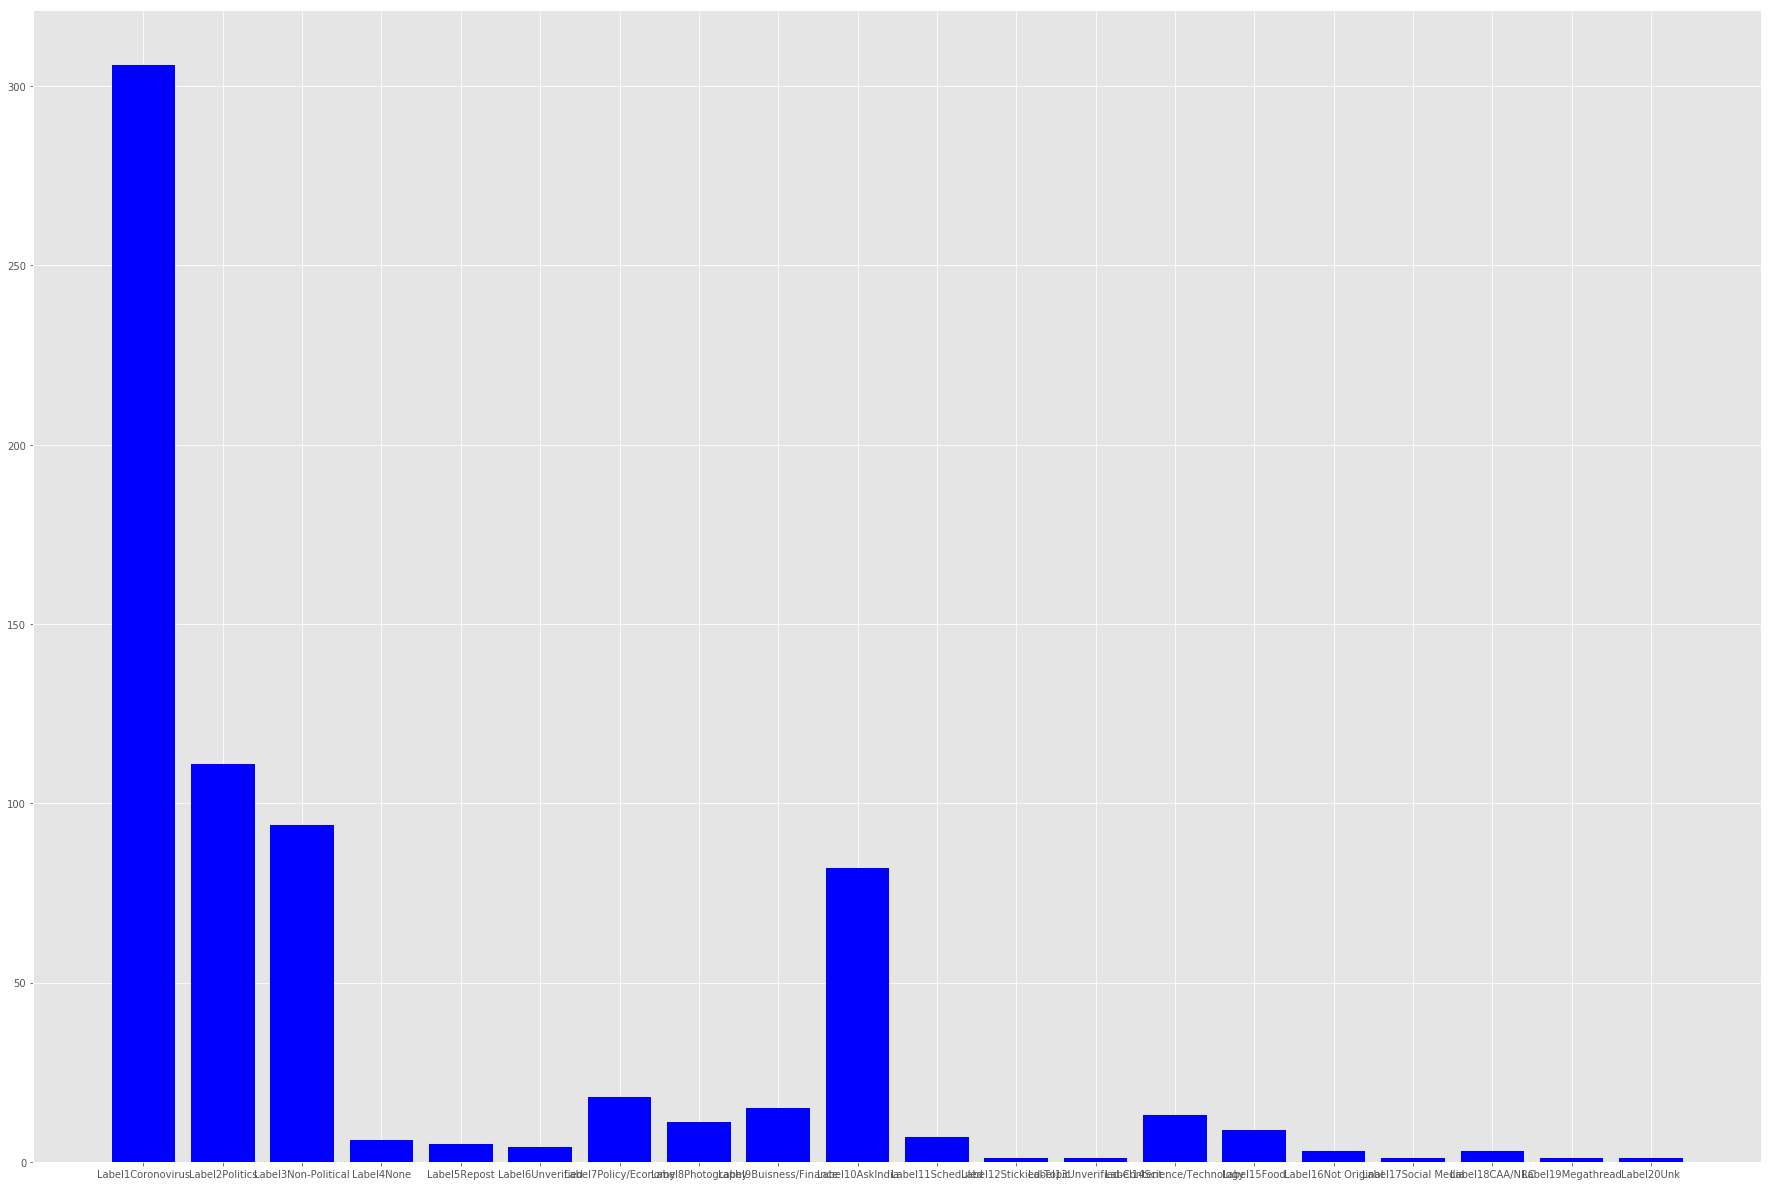

In [7]:
fig=plt.figure()
ax=fig.add_axes([4,4,4,4])
ax.bar(labels,vals,color='b')
plt.show()

#Analysis
The Dataset is highly imbalanced Posts of Coronavirus are highest by a margin and some flairs like MegaThread and Not Original have barely 1-2 posts. If the data is fed untreated like this the model is mostly to predict each post as 0 (Coronavirus)

I decided to make the Dataset a bit more even by seperating the flairs into some groups

### Dropping Columns
- ### 'Unknown', 'Megathread', 'CAA/NRC', 'Social Media', 'Not Original','Unverified-Content','Stickied-Topic',
These flairs have very little posts and cant be used as a feature.

### Others Flair
- ### 'Policy/Economy', 'Photography', 'Buisness/Finance', 'Science/Technology', 'Food'
These dont have many posts independently but collectively have enough, Hence I made a flair called Objects to denote these flairs collectively. Further another model can be trained to further classify these Object posts into the respective categories
    
### Test Set
- ### 'None', 'Repost', 'Unverified', 'Scheduled'
These flairs dont have enough posts in them and their flair is not conclusively telling what they are about either. Hence I decided to use them as a test set and let the trained model identify their flairs

In [8]:
dropping_cols=['Label20Unk','Label19Megathread','Label18CAA/NRC','Label17Social Media',
              'Label16Not Original','Label13Unverified-Content','Label12Stickied-Topic',
              ]

In [9]:
other=['Label7Policy/Economy',
      'Label8Photography',
      'Label9Buisness/Finance',
       'Label14Science/Technology',
       'Label15Food',
       ]

In [10]:
test_set=['Label4None',
         'Label5Repost',
         'Label6Unverified',
         'Label11Scheduled']

In [11]:
train_data=train_data.drop(dropping_cols,axis=1)

In [12]:
train_data.shape

(692, 21)

In [13]:
"""New Column for Objects Flair"""
train_data['Label4Objects']=0

In [14]:
for i in range(len(train_data)):
    for nam in other:
        if (train_data.loc[i,nam]==1):
            train_data.loc[i,'Label4Objects']=1
    
    

In [15]:
train_data[train_data['Label4Objects']==1].head()

,idx,Title,Score,ID,Image,Num_Comments,Created,Body,Label1Coronovirus,Label2Politics,...,Label5Repost,Label6Unverified,Label7Policy/Economy,Label8Photography,Label9Buisness/Finance,Label10AskIndia,Label11Scheduled,Label14Science/Technology,Label15Food,Label4Objects
23,23,Covid-19 lockdown impact: Unemployment rate ri...,28,fweqm5,https://www.livemint.com/news/india/covid-19-l...,1,1.586266e+09,NaN,0,0,...,0,0,1,0,0,0,0,0,0,1
27,27,Starry timelapse from my roof. 600 photos{f/3....,33,fwctr4,https://v.redd.it/a3y5judnabr41,2,1.586258e+09,NaN,0,0,...,0,0,0,1,0,0,0,0,0,1
31,31,Isn't it just fucking great how companies like...,242,fw14l3,https://www.reddit.com/r/india/comments/fw14l3...,52,1.586217e+09,And I know that a lot of upper management in t...,0,0,...,0,0,0,0,1,0,0,0,0,1
44,44,India’s richest man lost $300 million a day in...,12,fwfkf8,https://qz.com/india/1833510/coronavirus-wipes...,5,1.586270e+09,NaN,0,0,...,0,0,0,0,1,0,0,0,0,1
70,70,How the 2020 Stock Market Crash is Different f...,6,fwf01u,https://www.financereads.in/how-the-2020-stock...,0,1.586267e+09,NaN,0,0,...,0,0,0,0,1,0,0,0,0,1


In [16]:
"""Dropping the Original Contents of Others"""
train_data=train_data.drop(other,axis=1)

In [17]:
"""Making the Test Set"""
test_set

['Label4None', 'Label5Repost', 'Label6Unverified', 'Label11Scheduled']

In [18]:
test_dat=train_data[train_data['Label4None']==1]

In [19]:
test_dat=test_dat.append(train_data[train_data['Label5Repost']==1])
test_dat=test_dat.append(train_data[train_data['Label6Unverified']==1])
test_dat=test_dat.append(train_data[train_data['Label11Scheduled']==1])


In [20]:
test_dat.shape

(22, 17)

In [21]:
train_data=train_data.drop(test_set,axis=1)

In [22]:
train_data['Label5AskIndia']=train_data['Label10AskIndia']

In [23]:
train_data.head()

,idx,Title,Score,ID,Image,Num_Comments,Created,Body,Label1Coronovirus,Label2Politics,Label3Non-Political,Label10AskIndia,Label4Objects,Label5AskIndia
0,0,Coronavirus (COVID-19) Megathread - News and U...,287,fqqdsg,https://www.reddit.com/r/india/comments/fqqdsg...,6834,1.585451e+09,**Central thread for sharing coronavirus News ...,1,0,0,0,0,0
1,1,Firozabad police fact-checking zee news (trans...,680,fwcz7h,https://i.redd.it/jbal4gxocbr41.jpg,62,1.586258e+09,NaN,0,1,0,0,0,0
2,2,Donald Trump talks of ‘retaliation’ if India t...,371,fwclvi,https://economictimes.indiatimes.com/industry/...,135,1.586257e+09,NaN,1,0,0,0,0,0
3,3,Mom came up with this impressive idea to celeb...,3129,fvz69t,https://i.redd.it/gurfdfd1e7r41.jpg,183,1.586210e+09,NaN,0,0,1,0,0,0
4,4,9 PM 9 Minutes: House Catches Fire In Bihar; G...,181,fwdysc,https://news.abplive.com/news/india/coronaviru...,14,1.586262e+09,NaN,0,0,1,0,0,0


In [24]:
train_data=train_data.drop('Label10AskIndia',axis=1)

In [25]:
labels=train_data.columns[8:]
labels

Index(['Label1Coronovirus', 'Label2Politics', 'Label3Non-Political',
       'Label4Objects', 'Label5AskIndia'],
      dtype='object')

# Analysis
The Rest of the Dataset is farily evenly divided except for the Coronavirus class which is about 3 times the other
Taking some out from the corona Virus class and adding them to the test set


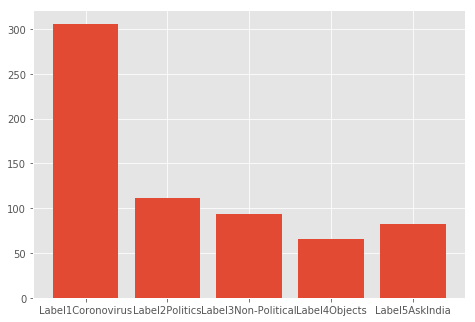

In [26]:
vals=[]

for i in labels:
    vals.append(train_data[i].value_counts()[1])
    
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.bar(labels,vals)
plt.show()

In [27]:
dropping_list=list(train_data[train_data['Label1Coronovirus']==1][120:].index)

In [28]:
train_data=train_data.drop(dropping_list)

In [29]:
train_data.shape

(506, 13)

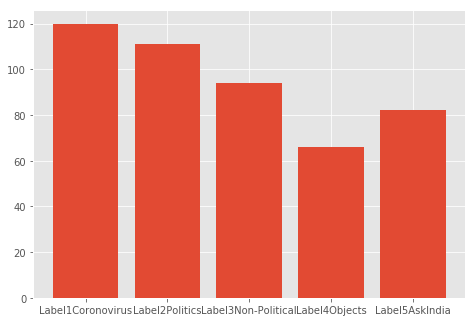

In [30]:
vals=[]

for i in labels:
    vals.append(train_data[i].value_counts()[1])
    
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.bar(labels,vals)
plt.show()

In [31]:
"""Saving the processed Dataset to updated_csv"""
train_data.to_csv('updated_train.csv')

In [32]:
"""Saving the Test set"""
test_dat.to_csv('Test_data.csv')

In [33]:
train_data.shape

(506, 13)

In [34]:
train_data=train_data.fillna(0)

In [35]:
train_data=train_data.reset_index()


# Image Data

For the extractable images the Image link should be to a picture. To identify that I compared last 4 elements of Image ID and saw whether they were of the format .jpg or .png

In [36]:
png=0
jpg=0

for i in range(len(train_data)):
    a=train_data.loc[i,'Image']
    if a[-4:]=='.png':
        png+=1
        
    if a[-4:]=='.jpg':
        jpg+=1
        
jpg,png
    

(30, 8)

Since only 30 pngs and 8 jpg images are available, there is not enough data to use the images as a feature

In [ ]:
train[train['Body'].notnull()]

## Unrequired Datapoints
After removing the test set columns some rows are such that they correspond to none of the existing flairs. They have to be removed.

A temporary Column Sum is created which has the sum of all labels and ideally since each post belongs to a single flair it should be 1 for all values

In [38]:
train_data['Sum']=train_data['Label1Coronovirus']+train_data['Label2Politics']+train_data['Label3Non-Political']+train_data['Label4Objects']+train_data['Label5AskIndia']

In [39]:
"""Indexes of those data points which don't belong to any specific flairs"""
output_less=train_data[train_data['Sum']!=1].index

In [40]:
train_data.drop(output_less,inplace=True)

In [41]:
"""Now each data point has a flair value"""
train_data.shape, train_data['Sum'].sum()

((473, 15), 473)

In [42]:
"""The Sum column is no longer required"""
del train_data['Sum']

In [43]:
train_data.to_csv('updated_train.csv')

# Statistical Anlysis of the Textual Data of the Titles

I decided to try and find some other features which can be used as variables aiding in the classification process.

To analyse the data instead oof using pandas grouping each time instead I decided to make different temporary datasets for the flairs

In [44]:
Coronadb=train_data[train_data['Label1Coronovirus']==1]
Politicsdb=train_data[train_data['Label2Politics']==1]
NonPoliticaldb=train_data[train_data['Label3Non-Political']==1]
Objectsdb=train_data[train_data['Label4Objects']==1]
AskIndiadb=train_data[train_data['Label5AskIndia']==1]

In [45]:
print(len(Coronadb))
print(len(Politicsdb))
print(len(NonPoliticaldb))
print(len(Objectsdb))
print(len(AskIndiadb))

120
111
94
66
82


# Features

### 1. Word Count
Comparing the number of words in the posts. This feature is also necessary for using as a denominator in other features

### 2. Character Count
Comparing the number of characters. This feature is also necessary to normalize/ use as a denominator for other features

### 3. Punctuation Count
Comparing the ratio of Punctuation to characters in the datasets. It is divided by number of characters in order to remove the factor of length of post. I am guessing polar posts like those of Politics and Coronavirus use more punctuation like '!' compared to objective posts like Non political

### 4. Capital Letters
Comparing the ratio of Capital letters to words. Ideally this should be less than one. Here also I think polar posts will have more explanatory statements thereby more usage of capital letters.

In [46]:
import string
punc=string.punctuation

In [47]:
def features(dataframe):
    dataframe.loc[:,'word_count']=dataframe.loc[:,'Title'].apply(lambda x:len(x.split()))
    dataframe['char_count']=dataframe['Title'].apply(lambda x:len(x.replace(" ","")))
    dataframe['punc_count']=(dataframe['Title'].apply(lambda x : len([a for a in x if a in punc])))/dataframe['word_count']
    dataframe['capitals'] = (dataframe['Title'].apply(lambda comment: sum(1 for c in comment if c.isupper())))/dataframe['word_count']
    
    return dataframe

In [ ]:
"""Calling the Function on all indiviual flair datasets"""

features(Coronadb)
features(Politicsdb)
features(NonPoliticaldb)
features(Objectsdb)
features(AskIndiadb)
Coronadb.head()

# Word Count

They are approximately similar for all the databases hence can't be used as a feature to distinguish

In [49]:
datasets=[Coronadb,Politicsdb,NonPoliticaldb,Objectsdb,AskIndiadb]
dataset_names=['Coronadb','Politicsdb','NonPoliticaldb','Objectsdb','AskIndiadb']

13.866666666666667
13.495495495495495
12.01063829787234
13.287878787878787
11.975609756097562


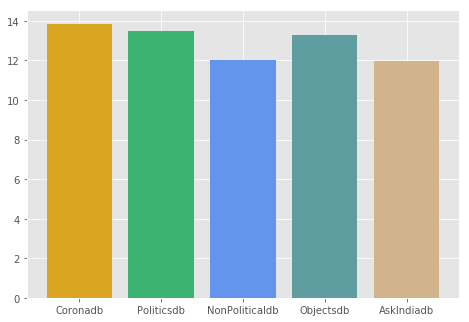

In [50]:

print(Coronadb['word_count'].mean())
print(Politicsdb['word_count'].mean())
print(NonPoliticaldb['word_count'].mean())
print(Objectsdb['word_count'].mean())
print(AskIndiadb['word_count'].mean())

vals=[]

for i in datasets:
    vals.append(i['word_count'].mean())
    
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.bar(dataset_names,vals,color=colors)
plt.show()

# Char Count
These are higher for Corona and Politics than the other, but not very significantly. Not sure if this will be very useful in isolation

73.30833333333334
70.57657657657657
61.191489361702125
68.43939393939394
56.53658536585366


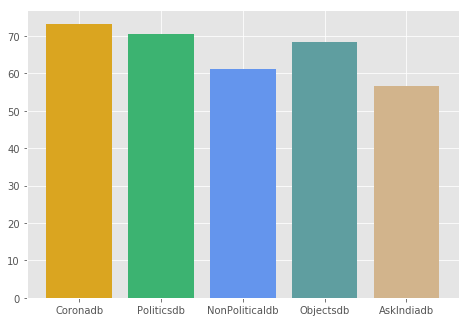

In [51]:

print(Coronadb['char_count'].mean())
print(Politicsdb['char_count'].mean())
print(NonPoliticaldb['char_count'].mean())
print(Objectsdb['char_count'].mean())
print(AskIndiadb['char_count'].mean())

vals=[]
for i in datasets:
    vals.append(i['char_count'].mean())
    
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.bar(dataset_names,vals,color=colors)
plt.show()

# Capital Count
Similar to char count, slightly more for the first 2. Can be used as feature

0.582331691358032
0.5327189176972292
0.46970095457061073
0.47886904638241534
0.31410931101067224


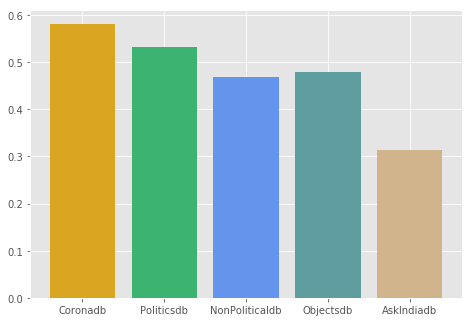

In [52]:

print(Coronadb['capitals'].mean())
print(Politicsdb['capitals'].mean())
print(NonPoliticaldb['capitals'].mean())
print(Objectsdb['capitals'].mean())
print(AskIndiadb['capitals'].mean())

vals=[]
for i in datasets:
    vals.append(i['capitals'].mean())
    
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.bar(dataset_names,vals,color=colors)
plt.show()

# Punctuation Count
Highest for Objects flair. Can use as a feature not sure about relevance

0.15440033953275828
0.17254359584734405
0.17159482669618692
0.21863789145429066
0.14696565789217278


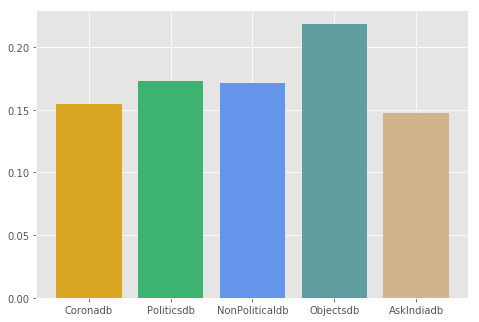

In [53]:

print(Coronadb['punc_count'].mean())
print(Politicsdb['punc_count'].mean())
print(NonPoliticaldb['punc_count'].mean())
print(Objectsdb['punc_count'].mean())
print(AskIndiadb['punc_count'].mean())

vals=[]
for i in datasets:
    vals.append(i['punc_count'].mean())
    
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.bar(dataset_names,vals,color=colors)
plt.show()

# Most Common Words
Seeing most common word occurences in different flairs. Not sure how to use this as a flair

In [ ]:
Corona_sents=[]
for i in range(Coronadb.shape[0]):
    Corona_sents.extend(Coronadb.loc[i,'Title'].split())

In [55]:
from collections import Counter
counterLists=Counter(Corona_sents)

In [56]:
"""Most of the Top used words are stop words only"""
counterLists.most_common(10)

[('-', 2),
 ('Coronavirus', 1),
 ('(COVID-19)', 1),
 ('Megathread', 1),
 ('News', 1),
 ('and', 1),
 ('Updates', 1),
 ('3', 1)]

# Score
Score works as in Upvotes - Downvotes. So here I think the polar flairs like Coronavirus and Politics should have a low score, as they have as many people disagreeing as those who agree. 

### Results-
On analysis it is found that this is not the case nonpolitical has the highest average score. The spectrum is fairly varied and can act as a good feature. 

117.69166666666666
141.44144144144144
154.46808510638297
50.25757575757576
19.670731707317074


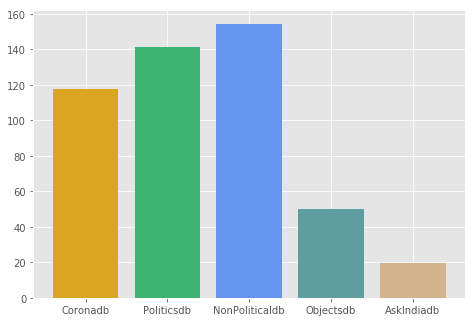

In [57]:
print(Coronadb['Score'].sum()/len(Coronadb))
print(Politicsdb['Score'].sum()/len(Politicsdb))
print(NonPoliticaldb['Score'].sum()/len(NonPoliticaldb))
print(Objectsdb['Score'].sum()/len(Objectsdb))
print(AskIndiadb['Score'].sum()/len(AskIndiadb))

vals=[]
for i in datasets:
    vals.append(i['Score'].sum()/len(i))
    
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.bar(dataset_names,vals,color=colors)
plt.show()


# Number of Comments
Here I think there will definitely be more discussion on posts of politics and coronavirus as they are more debatable. 

### Results-
The hypothesis was correct and the feature is well spread out, hence would be helpfull to the main model.

70.05
21.882882882882882
19.393617021276597
11.257575757575758
14.71951219512195


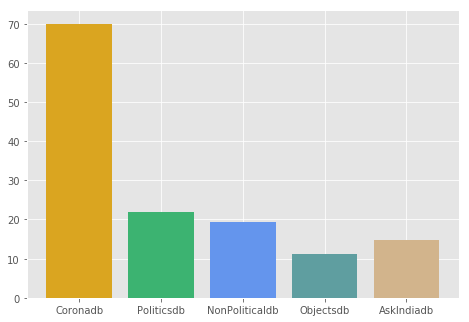

In [58]:
print(Coronadb['Num_Comments'].sum()/len(Coronadb))
print(Politicsdb['Num_Comments'].sum()/len(Politicsdb))
print(NonPoliticaldb['Num_Comments'].sum()/len(NonPoliticaldb))
print(Objectsdb['Num_Comments'].sum()/len(Objectsdb))
print(AskIndiadb['Num_Comments'].sum()/len(AskIndiadb))


vals=[]
for i in datasets:
    vals.append(i['Num_Comments'].sum()/len(i))
    
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.bar(dataset_names,vals,color=colors)
plt.show()
